<a href="https://colab.research.google.com/github/Yehan-Manodya/CM2604-Machine-learning-cw/blob/source-code/ML_CW20232500_2409080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing dataset






In [140]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import pandas as pd
import numpy as np


In [142]:
dataset = pd.read_csv('/content/drive/My Drive/MLcoursework/bank-additional-full.csv', sep=';')

# Data Preprocessing

In [143]:
dataset.shape

(41188, 21)

In [144]:
dataset.duplicated().sum()

12

In [145]:
# Find duplicate rows
duplicates = dataset[dataset.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired 

In [146]:
# Remove duplicate rows
dataset = dataset.drop_duplicates()

print("Duplicates removed. Updated dataset shape:", dataset.shape)

Duplicates removed. Updated dataset shape: (41176, 21)


In [147]:
dataset.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [148]:
dataset.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [149]:
#chek for missing values
dataset.isnull().values.any()


False

In [150]:
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [151]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [152]:
# Check for uppercase letters in the entire dataset
uppercase_exists = dataset.applymap(lambda x: any(char.isupper() for char in str(x)) if isinstance(x, str) else False)

# Display rows and columns containing uppercase letters
uppercase_rows_cols = dataset[uppercase_exists.any(axis=1)]

print("Rows containing uppercase letters:")
print(uppercase_rows_cols)

<ipython-input-152-932ebac4c36a>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  uppercase_exists = dataset.applymap(lambda x: any(char.isupper() for char in str(x)) if isinstance(x, str) else False)


Rows containing uppercase letters:
Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


In [153]:
import string

categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Check for punctuation in the specified categorical columns
punctuation_exists = dataset[categorical_cols].applymap(
    lambda x: any(char in string.punctuation for char in str(x)) if isinstance(x, str) else False
)

# Display rows containing punctuation in categorical columns
rows_with_punctuation = dataset.loc[punctuation_exists.any(axis=1), categorical_cols]

print("Rows containing punctuation in the specified categorical columns:")
if rows_with_punctuation.empty:
    print("No rows with punctuation found.")
else:
    print(rows_with_punctuation)
    print(f"Number of rows with punctuation: {rows_with_punctuation.shape[0]}")


<ipython-input-153-6b00df93dbe0>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  punctuation_exists = dataset[categorical_cols].applymap(


Rows containing punctuation in the specified categorical columns:
               job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutco

In [154]:
#Remove punctuations
for col in categorical_cols:
    dataset[col] = dataset[col].str.replace('[{}]'.format(string.punctuation), '', regex=True)

print("Punctuation removed from the specified categorical columns.")

Punctuation removed from the specified categorical columns.


In [155]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,highschool,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,highschool,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [156]:
# Find columns with 'unknown' values
columns_with_unknown = dataset.columns[(dataset == 'unknown').any()].tolist()

print(f"Columns containing 'unknown': {columns_with_unknown}")


Columns containing 'unknown': ['job', 'marital', 'education', 'default', 'housing', 'loan']


In [157]:
# Count 'unknown' values in each column
unknown_counts = (dataset == 'unknown').sum()

print("Count of 'unknown' values per column:")
print(unknown_counts[unknown_counts > 0])


Count of 'unknown' values per column:
job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64


In [158]:
# Calculate the mode for each specified column
column_modes = dataset[columns_with_unknown].mode().iloc[0]

# Display the mode values
print("Mode value for each specified column:")
print(column_modes)


Mode value for each specified column:
job                     admin
marital               married
education    universitydegree
default                    no
housing                   yes
loan                       no
Name: 0, dtype: object


In [159]:
# Iterate through each column to replace 'unknown' with the column's mode
for column in columns_with_unknown:
  dataset[column] = dataset[column].replace('unknown',column_modes[column] )# Replace 'unknown' with the mode value

# Verify the changes
print("After replacing 'unknown':")
print(dataset[columns_with_unknown].head())


After replacing 'unknown':
         job  marital   education default housing loan
0  housemaid  married     basic4y      no      no   no
1   services  married  highschool      no      no   no
2   services  married  highschool      no     yes   no
3      admin  married     basic6y      no      no   no
4   services  married  highschool      no      no  yes


In [160]:
#Check how many values from each category in categorical columns
print(dataset['marital'].value_counts())
print(dataset['job'].value_counts())
print(dataset['education'].value_counts())
print(dataset['default'].value_counts())
print(dataset['housing'].value_counts())
print(dataset['loan'].value_counts())


marital
married     25001
single      11564
divorced     4611
Name: count, dtype: int64
job
admin           10749
bluecollar       9253
technician       6739
services         3967
management       2924
retired          1718
entrepreneur     1456
selfemployed     1421
housemaid        1060
unemployed       1014
student           875
Name: count, dtype: int64
education
universitydegree      13894
highschool             9512
basic9y                6045
professionalcourse     5240
basic4y                4176
basic6y                2291
illiterate               18
Name: count, dtype: int64
default
no     41173
yes        3
Name: count, dtype: int64
housing
yes    22561
no     18615
Name: count, dtype: int64
loan
no     34928
yes     6248
Name: count, dtype: int64


# Save the preprocessed dataset for training models

In [161]:
# Save the modified dataset to a new CSV file
dataset.to_csv('/content/drive/My Drive/MLcoursework/cleaned_dataset.csv', index=False)

print("Dataset has been saved as 'cleaned_dataset.csv'.")
dataset.isnull().values.any()

Dataset has been saved as 'cleaned_dataset.csv'.


False

In [162]:
dataset.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [163]:
dataset.shape

(41176, 21)

In [164]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,highschool,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,highschool,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Feadfoward Neaural Network(FNN)model

In [165]:
# Install category_encoders
!pip install category_encoders

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2  # L2 regularization
from sklearn.preprocessing import StandardScaler
import category_encoders as ce  # Import the category_encoders library
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs

# Load the cleaned dataset
dataset = pd.read_csv('/content/drive/My Drive/MLcoursework/cleaned_dataset.csv')

# Separate features (X) and target (y)
X = dataset.drop('y', axis=1)  # Drop the target column
y = dataset['y']               # Target column

# Apply One-Hot Encoding to categorical features
categorical_features = categorical_cols#X.select_dtypes(include=['object']).columns.tolist()  # Get a list of categorical columns
encoder = ce.OneHotEncoder(cols=categorical_features, handle_unknown='ignore')  # Create a OneHotEncoder object
X = encoder.fit_transform(X)  # Apply the encoding

# Convert target variable to numerical
y = y.replace({'no': 0, 'yes': 1})  # Replace 'no' with 0 and 'yes' with 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Get the indices of the test rows
test_indices = X_test.index
print("Test set indices:")
print(test_indices)

# Data normalization using Z-score scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model with L2 regularization and Dropout
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.1)),  # Input layer with L2 regularization
    Dense(16, activation='relu', kernel_regularizer=l2(0.1)),  # Hidden layer with L2 regularization
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.1))  # Output layer with L2 regularization
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,  # Maximum number of epochs
    batch_size=32,
    validation_data=(X_test, y_test)#stores the test data accuracy
    )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
<ipython-input-165-61784d054a6b>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'no': 0, 'yes': 1})  # Replace 'no' with 0 and 'yes' with 1
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test set indices:
Index([ 1111, 15995,  5646, 11298, 17125, 19557,  5566, 26521, 17738, 31480,
       ...
       15191, 10687, 27029, 31048, 22353, 28113, 23554, 36633, 13045,  3545],
      dtype='int64', length=12353)
Epoch 1/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8757 - loss: 2.3901 - val_accuracy: 0.8865 - val_loss: 0.3978
Epoch 2/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8841 - loss: 0.3935 - val_accuracy: 0.8865 - val_loss: 0.3746
Epoch 3/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8855 - loss: 0.3735 - val_accuracy: 0.8865 - val_loss: 0.3654
Epoch 4/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8862 - loss: 0.3637 - val_accuracy: 0.8865 - val_loss: 0.3598
Epoch 5/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8897 - loss: 0.3527 - val_accuracy: 0.8865 - val_loss: 0.3573
Epoch 6/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8879 - loss: 0.3544 - val_accuracy: 0.8865 - val_loss: 0.3559
Epoch 7/15
90

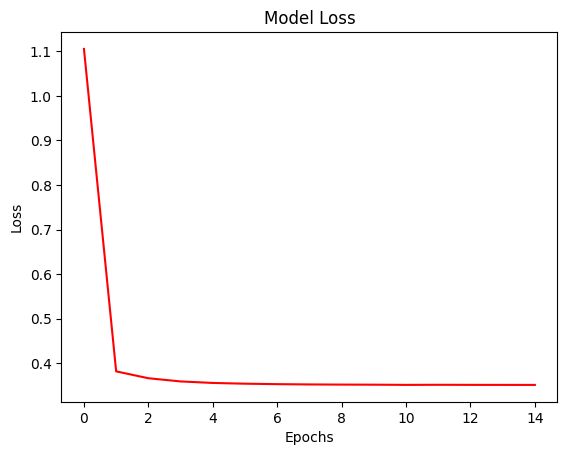

In [166]:
#Visualize the model loss
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

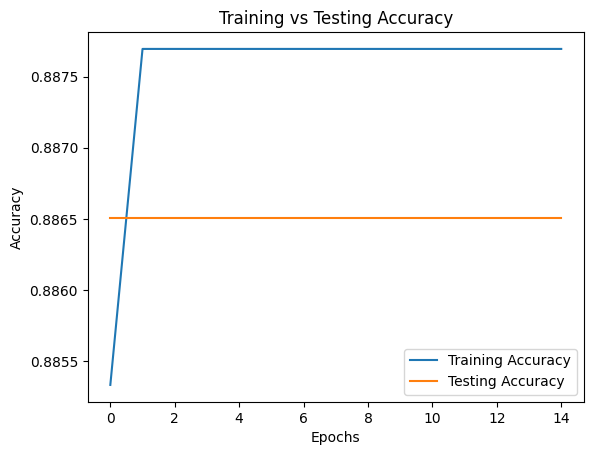

In [167]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')#Training accuracy after each epoch.
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')#Validation (test) accuracy after each epoch.
plt.title('Training vs Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [168]:
# Make predictions on the test set
predictions = (model.predict(X_test) > 0.5).astype(int)
# Compare predictions with actual values
print("Actual values:")
print(y_test.values[:10])
print("Predicted values:")
print(predictions[:10].ravel())


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Actual values:
[0 0 0 0 0 0 0 0 0 0]
Predicted values:
[0 0 0 0 0 0 0 0 0 0]


# Random Forest

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce  # Import the category_encoders library
from sklearn.metrics import precision_score, recall_score

# Load the cleaned dataset
dataset = pd.read_csv('/content/drive/My Drive/MLcoursework/cleaned_dataset.csv')

# Separate features (X) and target (y)
X = dataset.drop('y', axis=1)  # Drop the target column
y = dataset['y']               # Target column

# Apply One-Hot Encoding to categorical features
categorical_features = categorical_cols#X.select_dtypes(include=['object']).columns.tolist()  # Get a list of categorical columns
encoder = ce.OneHotEncoder(cols=categorical_features, handle_unknown='ignore')  # Create a OneHotEncoder object
X = encoder.fit_transform(X)  # Apply the encoding'''

#Convert target variable to numerical
y = y.replace({'no': 0, 'yes': 1})  # Replace 'no' with 0 and 'yes' with 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the Random Forest model with techniques applied
rf_model = RandomForestClassifier(
    n_estimators=50,         # Reduce number of trees
    max_depth=10,            # Limit tree depth
    min_samples_split=5,     # Increase minimum samples for splits
    min_samples_leaf=2,      # Increase minimum samples for leaves
    max_features='sqrt',     # Reduce features considered at each split
    random_state=0
)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(
<ipython-input-169-c46fc97cdf78>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'no': 0, 'yes': 1})  # Replace 'no' with 0 and 'yes' with 1


Train Accuracy: 92.20%
Test Accuracy: 91.16%


In [170]:
predictions = rf_model.predict(X_test)
# Compare predictions with actual values
print("Actual values:")
print(y_test.values[:10])
print("Predicted values:")
print(predictions[:10])

Actual values:
[0 0 0 0 0 0 0 0 0 0]
Predicted values:
[0 0 0 0 0 0 0 0 0 0]


#Model Accuracy Comparrision

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8881 - loss: 0.3509


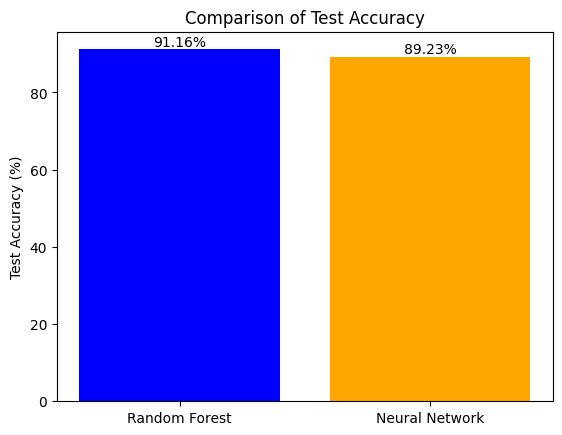

In [171]:
import matplotlib.pyplot as plt

nn_test_loss,nn_test_accuracy = model.evaluate(X_test, y_test)
# Define the testing accuracies for both models
rf_test_accuracy = test_accuracy * 100  # Random Forest test accuracy
nn_test_accuracy = nn_test_accuracy* 100 # Neural Network test accuracy

# Create a list with model names and their respective accuracies
models = ['Random Forest', 'Neural Network']
accuracies = [rf_test_accuracy, nn_test_accuracy]

# Create the bar plot
bars=plt.bar(models, accuracies, color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Test Accuracy')

# Add accuracy levels over the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()
